Here we are going to implement an explicit finite difference method to solve the voundary value problem
\begin{align*} 
\frac{\partial u}{\partial t}(t,x) &= \frac{\partial^2u}{\partial x^2}(t,x), 
&& 0<t<T, \quad x_L<x<x_R,\\
u(0,x)&= u_0(x),&& x_L< x <x_R,\\
u(t,x_L)&= u_L(t),&& 0\leq t\leq T,\\
u(t,x_R)&= u_R(t),&& 0\leq t\leq T.
\end{align*}
We will also experiment with other bounday conditions.

In [1]:
import numpy as np
import seaborn as sns
%pylab inline
from IPython.display import HTML
from matplotlib import animation, rc

Populating the interactive namespace from numpy and matplotlib


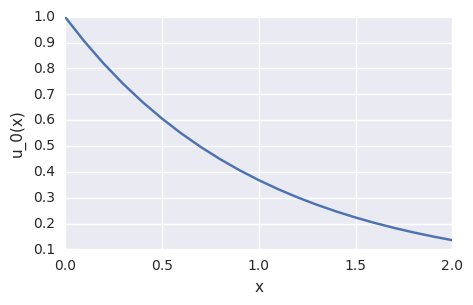

In [41]:
# We begin by setting some parameters of the problem and showing the initial datum

x_L = 0; x_R = 2; T = 1;
#u_0 = lambda x: np.maximum(np.sin(np.pi*x)*(x<1),0)
u_0 = lambda x: np.exp(-x)
u_L = lambda t: np.zeros(np.shape(t))
u_R = lambda t: np.ones(np.shape(t))

J = 20; # the number of intervals in the x-direction
N = 250; # the number of time steps

x = np.linspace(x_L,x_R,J+1);
t = np.linspace(0,T,N+1)

# Initialize the solution vector and compute the boundary values
U = np.zeros((N+1,J+1));
U[0,:] = u_0(x)

# Plot u_0
fig = figure(figsize=(5,3));
line, = plot(x,U[0,:]);
xlabel('x')
ylabel('u_0(x)');

In [42]:
dt = T/N; dx = (x_R-x_L)/J;
nu = dt/dx**2
print('The value of nu is %f' %nu)
numax = 1/(2*(np.sin((J-1)*np.pi/(2*J))**2))
print('The largest stable value is %f'%numax)
ind = arange(1,J) # the indices of the interior points
# The explicit finite difference propagation
for n in range(N):
    U[n+1,ind] = nu*U[n,ind-1]+(1-2*nu)*U[n,ind]+nu*U[n,ind+1]
    # Dirichlet boundary conditions
    #U[n+1,0] = u_L[n+1]; U[n+1,-1] = u_R[n+1]; 
    # homogeneous Neumann boundary conditions
    #U[n+1,0] = U[n+1,1]; U[n+1,-1] = U[n+1,-2];
    # linear extrapolation conditions
    U[n+1,0] = 2*U[n+1,1]-U[n+1,2]; U[n+1,-1] = 2*U[n+1,-2]-U[n+1,-3];

The value of nu is 0.400000
The largest stable value is 0.503097


In [43]:
# make a movie
def init():
    line.set_data(x, U[0,:])
    return (line,)
def update(n):
    line.set_data(x, U[n+1,:])
    return (line,)
anim = animation.FuncAnimation(fig, update, init_func=init,
                               frames=N, interval=50, blit=True, repeat=False)
HTML(anim.to_html5_video())

In [9]:
U[-1,:]

array([  0.00000000e+00,   1.27818304e+09,  -2.44279390e+09,
         3.39035181e+09,  -4.03666208e+09,   4.32429721e+09,
        -4.22769956e+09,   3.75545224e+09,  -2.94951652e+09,
         1.88150331e+09,  -6.46310270e+08,  -6.46310270e+08,
         1.88150331e+09,  -2.94951652e+09,   3.75545224e+09,
        -4.22769956e+09,   4.32429721e+09,  -4.03666208e+09,
         3.39035181e+09,  -2.44279390e+09,   1.27818304e+09,
         0.00000000e+00])